# Predict the onset of diabetes based on diagnostic measures


In [230]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

%matplotlib inline

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#For warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [231]:
#Loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/NimeshMalhotra/Project-Diabetes/main/diabetes.csv")

## Data Exploration

In [232]:
data.shape

(767, 9)

In [233]:
len(data)

767

In [234]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [235]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [236]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [237]:
data["Outcome"].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

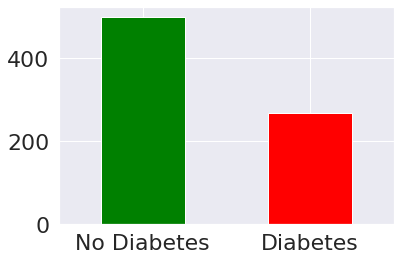

In [238]:
data["Outcome"].value_counts().plot(kind="bar",color=["green","red"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


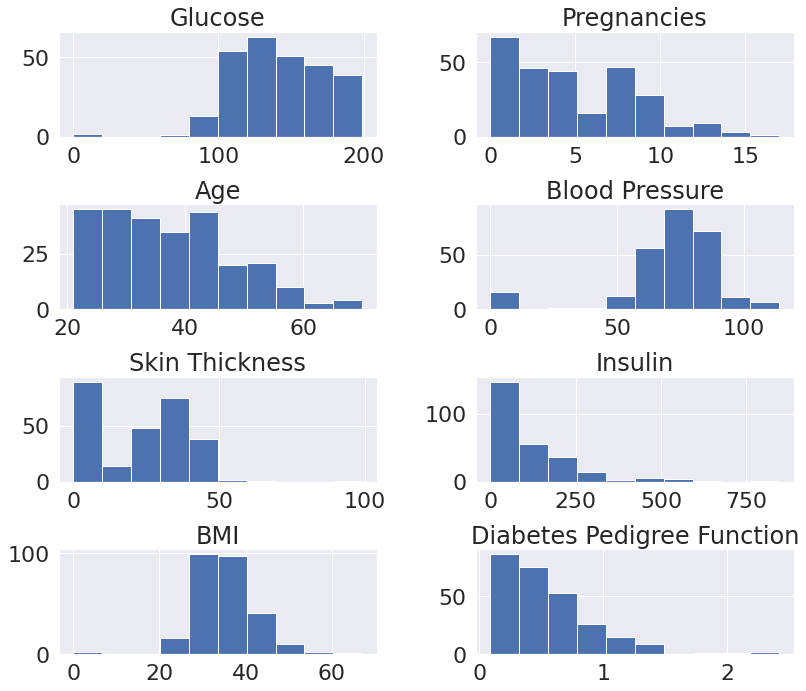

In [240]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

In [241]:
#corelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128621,0.141399,-0.081009,-0.074356,0.017469,-0.034065,0.543904,0.221272
Glucose,0.128621,1.000000,0.152718,0.058120,0.330836,0.220957,0.136886,0.262783,0.466143
BloodPressure,0.141399,0.152718,1.000000,0.207390,0.089003,0.281825,0.041300,0.239699,0.065135
SkinThickness,-0.081009,0.058120,0.207390,1.000000,0.437635,0.392867,0.184412,-0.113312,0.075426
Insulin,-0.074356,0.330836,0.089003,0.437635,1.000000,0.197744,0.184728,-0.042985,0.129973
BMI,0.017469,0.220957,0.281825,0.392867,0.197744,1.000000,0.140546,0.036031,0.292612
DiabetesPedigreeFunction,-0.034065,0.136886,0.041300,0.184412,0.184728,0.140546,1.000000,0.033044,0.173478
Age,0.543904,0.262783,0.239699,-0.113312,-0.042985,0.036031,0.033044,1.000000,0.237725
Outcome,0.221272,0.466143,0.065135,0.075426,0.129973,0.292612,0.173478,0.237725,1.000000


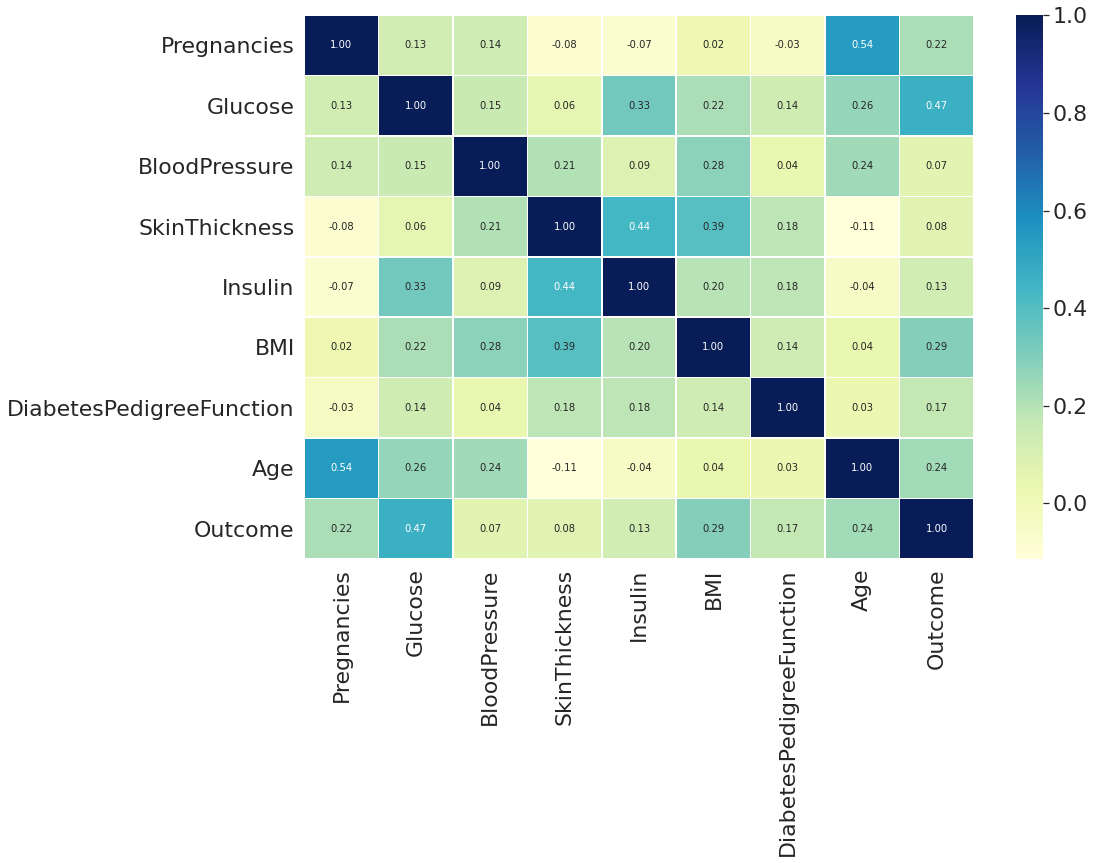

In [242]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Modeling

In [243]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)                                                                                      

In [244]:
(len(X_train),len(X_test))

(613, 154)

# Trying Different Models:

In [245]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [246]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [247]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [248]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [249]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [250]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.818182,0.772727,0.798701,0.818182


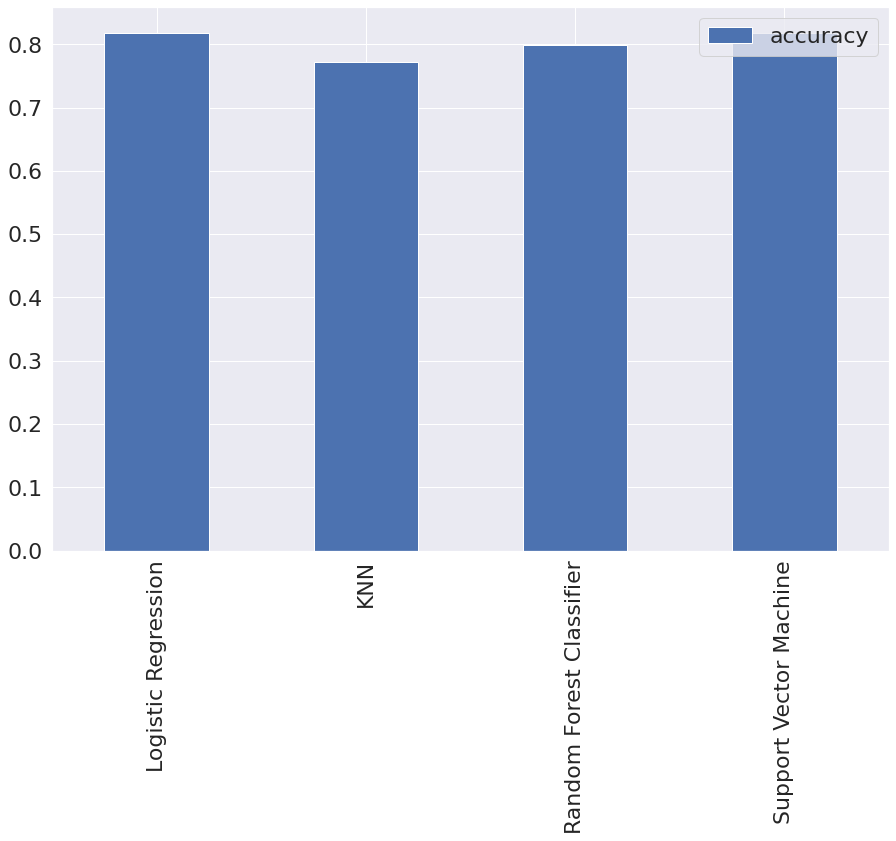

In [251]:
model_compare.T.plot.bar(figsize=(15,10));

In [252]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       110
           1       0.29      0.23      0.25        44

    accuracy                           0.62       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.59      0.62      0.60       154



# Loading and Saving a model

In [253]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))

In [254]:
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.8376623376623377

# Predicting the Outcome Using New data

In [255]:
## Enter the new data
X_test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
20,3,126,88,41,235,39.3,0.704,27


In [256]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

12
50
80
35
50
1.5
0.8
21


In [257]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])

In [258]:
row_df

,0,1,2,3,4,5,6,7
0,12,50,80,35,50,1.5,0.8,21


In [259]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.011700235559118652


In [260]:
loaded_model.predict(row_df)[0]


0